# NetFlix

**NetFlix is a very Popular Online streaming TV and movies shows which can be watch in TV,mobile and Tablet.Members can watch as they want,anytime or anywhere.Memeber can even download the shows and watch it offline.**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
df = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
#checking for null value if available
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<AxesSubplot:>

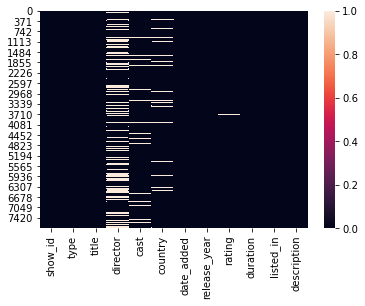

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
sns.heatmap(df.isnull())

In [6]:
#checking for the percentage of null values
df.isnull().sum()/len(df)*100

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In [7]:
df.dropna(subset=['date_added', 'rating'],inplace=True)

In [8]:
df.shape

(7770, 12)

In [9]:
df_cat=df.select_dtypes(include='object')
df_num=df.select_dtypes(include=np.number)
print('Numerical data:\n',df_num.columns)
print('Categorical data:\n',df_cat.columns)

Numerical data:
 Index(['release_year'], dtype='object')
Categorical data:
 Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [10]:
df.describe()

,release_year
count,7770.000000
mean,2013.935393
std,8.764357
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [11]:
#Let do Comparison for TV and Movies

Text(0.5, 1.0, 'Comparison between TV shows and Movie')

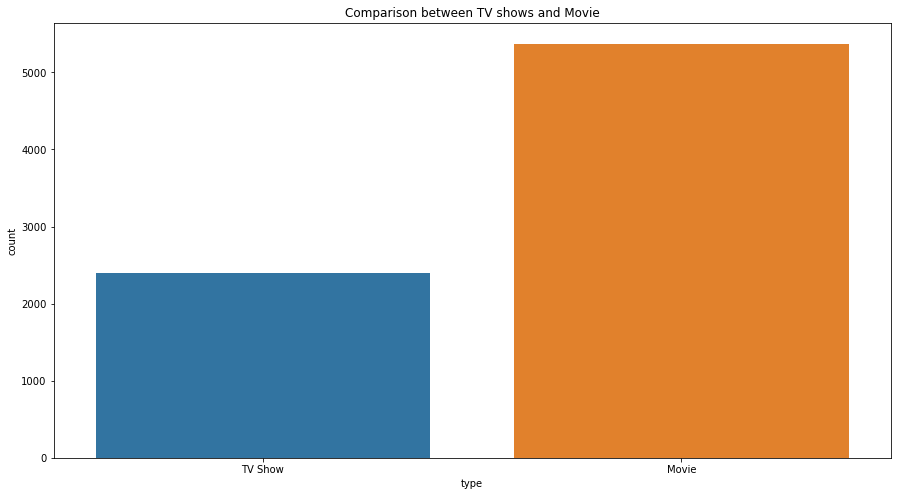

In [12]:
plt.figure(figsize=(15,8))
sns.countplot(x="type", data=df)
plt.title('Comparison between TV shows and Movie')

In [13]:
movies = df[df.type == 'Movie']
shows = df[df.type == 'TV Show']

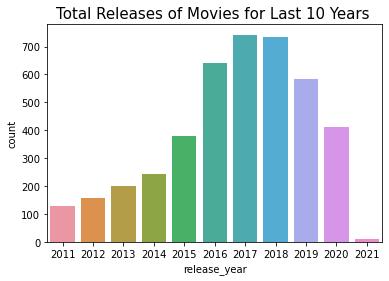

In [14]:
recent_5yrs = movies[movies.release_year >= 2011]
sns.countplot(x='release_year',data=recent_5yrs) 
plt.title('Total Releases of Movies for Last 10 Years ',size='15')  
plt.show()

Text(0.5, 1.0, 'Total Releases of Shows for Last 10 Years ')

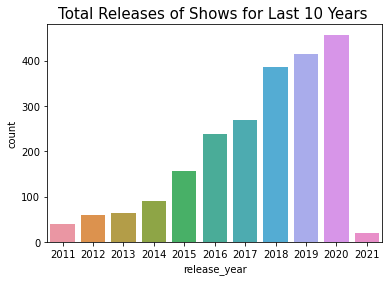

In [15]:
recent_5yrs = shows[shows.release_year >= 2011]
sns.countplot(x='release_year',data=recent_5yrs)
plt.title('Total Releases of Shows for Last 10 Years ',size='15')  

<AxesSubplot:ylabel='rating'>

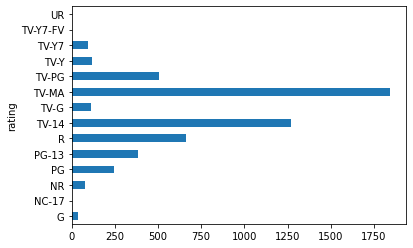

In [16]:
#Movie Rating
movies.groupby('rating')['show_id'].count().plot(kind='barh')

<AxesSubplot:ylabel='rating'>

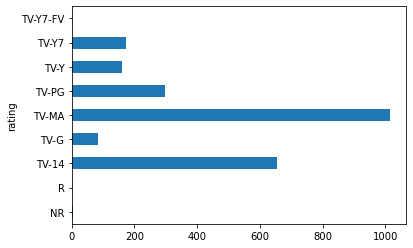

In [17]:
#TV SHOWS Rating
shows.groupby('rating')['show_id'].count().plot(kind='barh')

In [18]:
#Rating Shows in India

<AxesSubplot:xlabel='rating'>

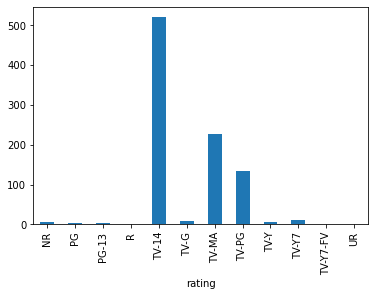

In [19]:
df[df.country=='India'].groupby('rating')['show_id'].count().plot(kind='bar')

In [20]:
# we can observe that rating for TV-14 in very high in country India

In [21]:
#number of series directed by directors
df.groupby('director')['show_id'].count().sort_values(ascending=False)

director
Raúl Campos, Jan Suter             18
Marcus Raboy                       16
Jay Karas                          14
Cathy Garcia-Molina                13
Martin Scorsese                    12
                                   ..
Jon Hurwitz, Hayden Schlossberg     1
Jon Izen                            1
Jon J. Whelan                       1
Benjamin Cohen, Nicolas Cotto       1
Kevin Reynolds                      1
Name: show_id, Length: 4047, dtype: int64

In [22]:
#director Raúl Campos, Jan Suter,Marcus Raboy and Jay Karas are among the most directed shows in netflix